In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(color_codes=True)

In [47]:
df=pd.read_csv('Train_Data.csv')

In [48]:
df.columns


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [49]:
df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


### 1.1. Missing Values

* In this  dataset, **`Credit_Product`** there is **11.93 %** missing data points.

In [27]:
df.isna().sum()/len(df)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(245725, 11)

In [30]:
#df.dropna(inplace=True)

In [31]:
df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [32]:
df.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [33]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


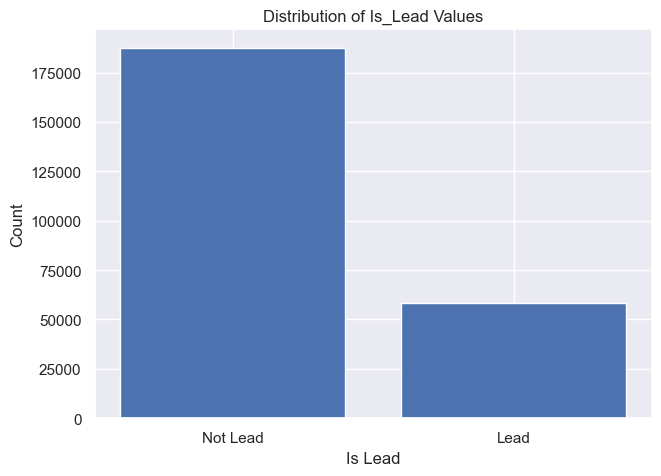

In [34]:
# Count the occurrences of each value in the 'Is_Lead' column
is_lead_counts = df['Is_Lead'].value_counts()
plt.bar(is_lead_counts.index, is_lead_counts.values, tick_label=['Not Lead', 'Lead'])
plt.xlabel('Is Lead')
plt.ylabel('Count')
plt.title('Distribution of Is_Lead Values')
plt.show()

In [35]:
#df.drop('ID',axis=1,inplace=True)

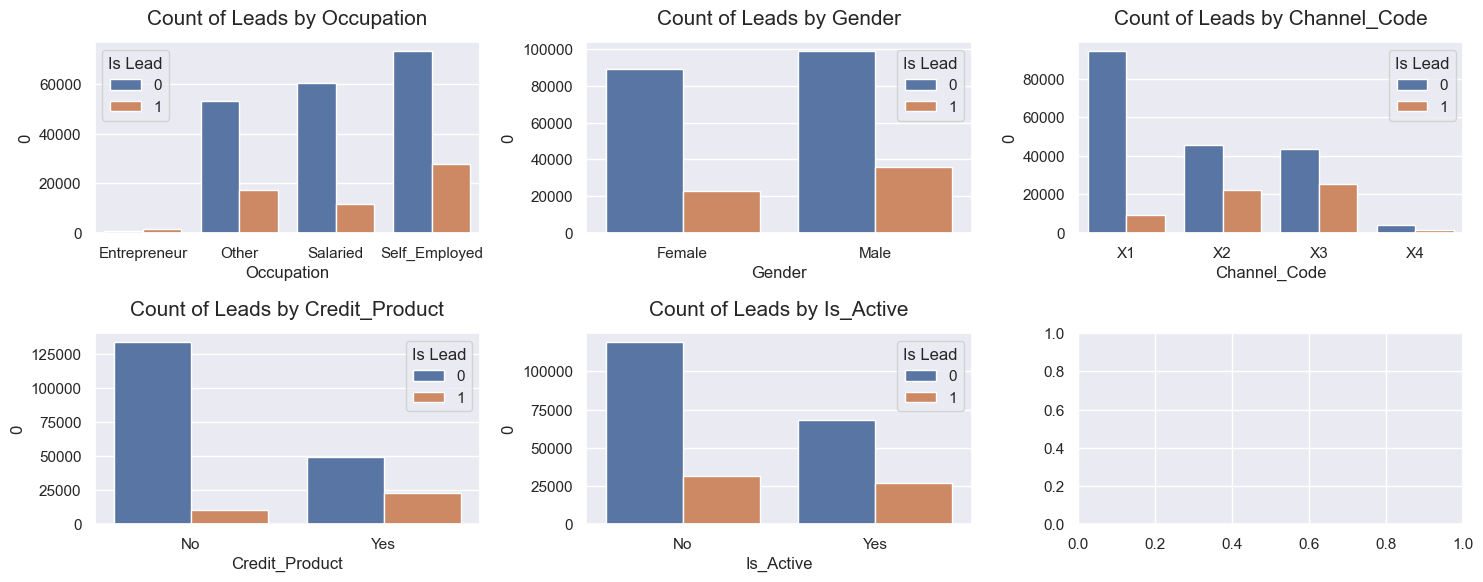

In [36]:
def plot_leads_by_category(data, group_column, target_column, subplot):
    counts = data.groupby([group_column, target_column]).size().reset_index()
    sns.barplot(x=group_column, y=0, data=counts, hue=target_column, ax=subplot)
    subplot.set_xlabel(group_column)
    #subplot.set_ylabel('Count')
    subplot.set_title(f'Count of Leads by {group_column}',size=15, y=1.05)
    subplot.legend(title='Is Lead')
    subplot.tick_params(axis='x', rotation=0)

fig, ax = plt.subplots(2, 3, figsize=(15, 6))
ax = ax.flatten()
plot_leads_by_category(df, 'Occupation', 'Is_Lead', subplot=ax[0])
plot_leads_by_category(df, 'Gender', 'Is_Lead', subplot=ax[1])
plot_leads_by_category(df, 'Channel_Code', 'Is_Lead', subplot=ax[2])
plot_leads_by_category(df, 'Credit_Product', 'Is_Lead', subplot=ax[3])
plot_leads_by_category(df, 'Is_Active', 'Is_Lead', subplot=ax[4])
plt.tight_layout()
plt.show()


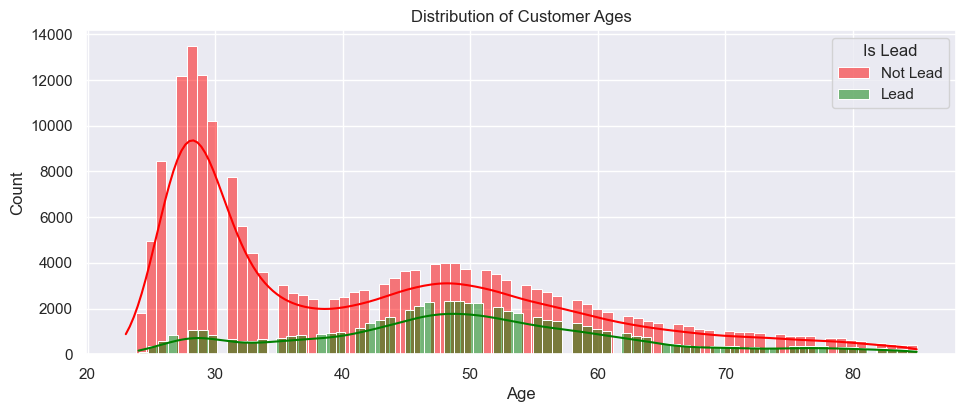

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Is_Lead'] == 0]['Age'], kde=True, color='red', label='Not Lead')
sns.histplot(df[df['Is_Lead'] == 1]['Age'], kde=True, color='green', label='Lead')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.legend(title='Is Lead')
plt.show()

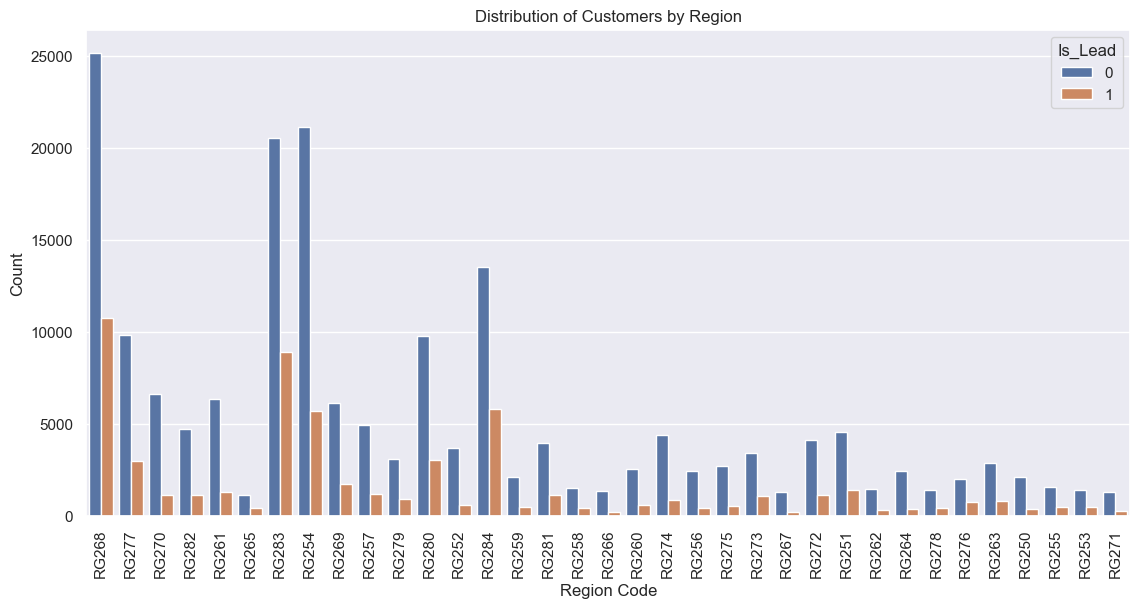

In [38]:
region_counts = df['Region_Code'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='Region_Code',data=df,hue='Is_Lead')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Distribution of Customers by Region')
plt.xticks(rotation=90)
plt.show()

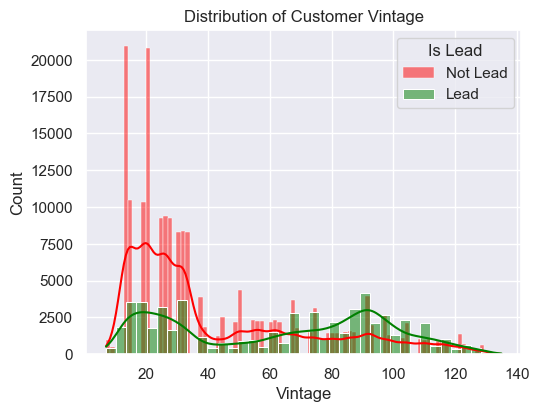

In [39]:
plt.figure(figsize=(5, 4))
sns.histplot(df[df['Is_Lead'] == 0]['Vintage'], kde=True, color='red', label='Not Lead')
sns.histplot(df[df['Is_Lead'] == 1]['Vintage'], kde=True, color='green', label='Lead')
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Distribution of Customer Vintage')
plt.legend(title='Is Lead')
plt.show()

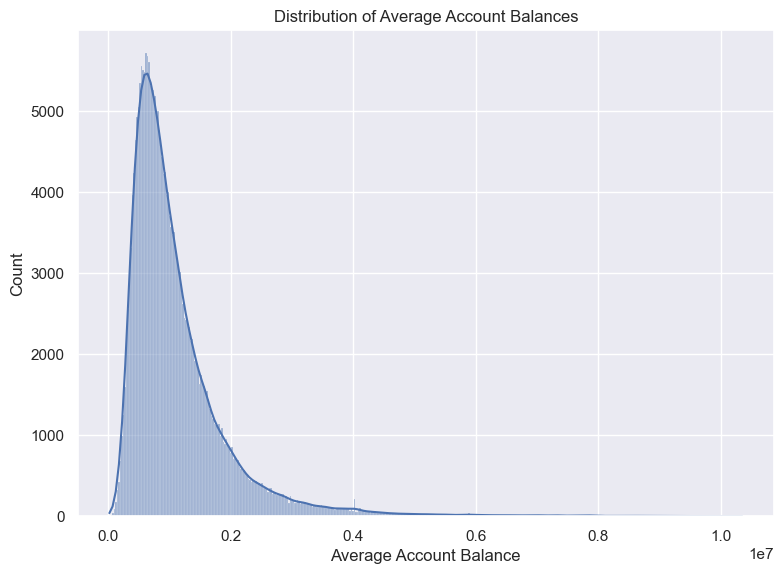

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Avg_Account_Balance'], kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balances')
plt.show()

In [55]:
total_customers_by_occu = df.groupby(['Occupation'])['ID'].count().reset_index()
total_customers_by_occu.rename(columns={'ID' : 'Total Customers'}, inplace=True)
num_customers_by_occupation = df.groupby(['Is_Lead', 'Occupation'])['ID'].count().reset_index()
num_customers_by_occupation = pd.merge(num_customers_by_occupation, total_customers_by_occu , how='inner', on='Occupation')
num_customers_by_occupation['% of Total'] = round((num_customers_by_occupation['ID'] / num_customers_by_occupation['Total Customers']) * 100, 1)
num_customers_by_occupation = num_customers_by_occupation.sort_values(by=['Is_Lead', '% of Total'], ascending = [False, False])

num_customers_by_occupation.drop(columns=['ID', 'Total Customers'], inplace=True, axis=1)
occ_df = pd.crosstab(num_customers_by_occupation['Occupation'], num_customers_by_occupation['Is_Lead'], values=num_customers_by_occupation['% of Total'], aggfunc=sum)

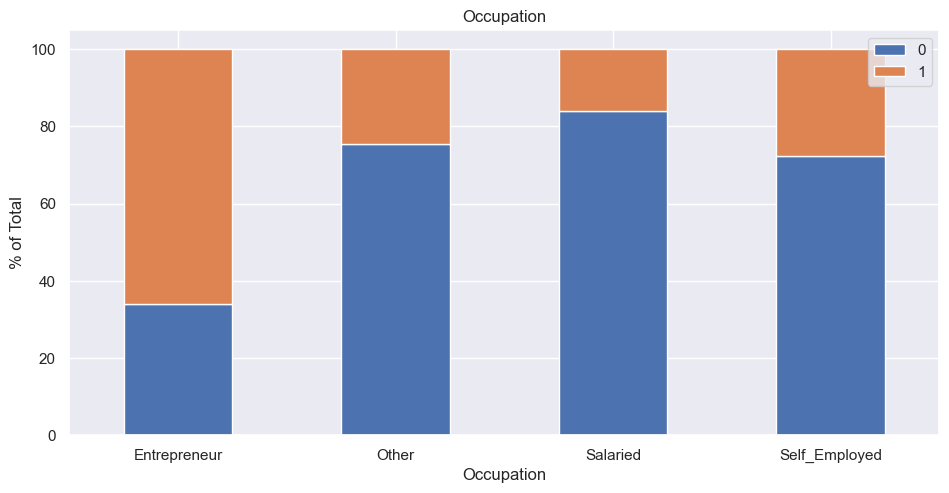

In [68]:
occ_df.plot(kind='bar', stacked=True, figsize=(10,5), rot=0,title='Occupation')
plt.legend([0, 1], loc='upper right')
plt.ylabel('% of Total')
plt.show()

In [71]:
df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

<h2>2. Data Cleaning</h2>

<h3>2.1. Missing Value of Credit_Product</h3>

The missing values in the feature **`Credit_Product`** will be imputed with **`No_Info`**

In [72]:
df=df.fillna("No_info")

In [73]:
df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

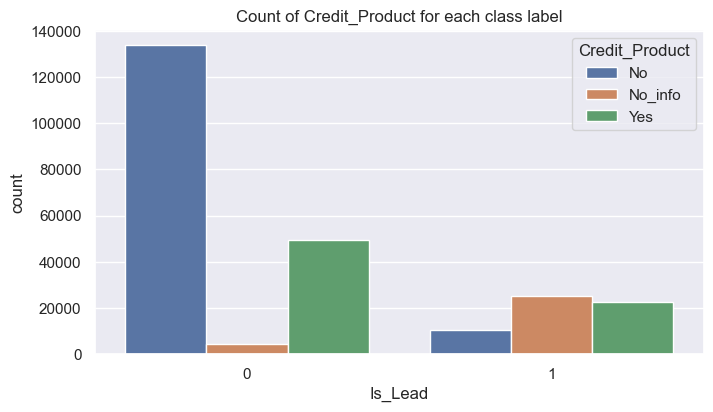

In [79]:
plt.figure(figsize=(7,4))
sns.countplot(x = "Is_Lead", data = df, hue = "Credit_Product")
plt.title("Count of Credit_Product for each class label")
plt.show()

In [19]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers


<h2>3. Feature Engineering</h2>

In [83]:
freq_counts = df["Region_Code"].value_counts(normalize=True)

In [84]:
df['Region_Code']=df["Region_Code"].map(freq_counts)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

standard_scaler = StandardScaler()

df[['Age','Vintage','Avg_Account_Balance']] = standard_scaler.fit_transform(df[['Age','Vintage','Avg_Account_Balance']])

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

for i in df.select_dtypes("object").columns:
  df[i]=label_encoder.fit_transform(df[i])


In [86]:
X=df.iloc[::,:-1]
y=df.iloc[::,-1]

In [ ]:
# downsampling the class with high values 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#rus = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X, y)


# Apply SMOTE upsampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape

In [89]:
y_resampled.value_counts()

0    187437
1    187437
Name: Is_Lead, dtype: int64

In [1]:
# Combine features and labels for creating the pair plot
#data_with_labels = pd.concat([X_resampled, y_resampled], axis=1)

# Create a pair plot
#sns.pairplot(data_with_labels, hue='Is_Lead', diag_kind='kde')
#plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),   
    "Knn_classifier":KNeighborsClassifier(),
    "Adaboost_classifier":AdaBoostClassifier(random_state=42),
    "Gradient_boosting_classifier": GradientBoostingClassifier(random_state=42 ,learning_rate=0.001),
    #'SVM': SVC(random_state=42,probability=True)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')
    print()




Logistic Regression:
Accuracy: 0.6965, Precision: 0.6913, Recall: 0.7115, F1-Score: 0.7012

Decision Tree:
Accuracy: 0.8654, Precision: 0.8591, Recall: 0.8746, F1-Score: 0.8668

Random Forest:
Accuracy: 0.9080, Precision: 0.9209, Recall: 0.8929, F1-Score: 0.9067

Knn_classifier:
Accuracy: 0.8201, Precision: 0.7701, Recall: 0.9133, F1-Score: 0.8356

Adaboost_classifier:
Accuracy: 0.7857, Precision: 0.7840, Recall: 0.7893, F1-Score: 0.7866

Gradient_boosting_classifier:
Accuracy: 0.7398, Precision: 0.7352, Recall: 0.7505, F1-Score: 0.7428



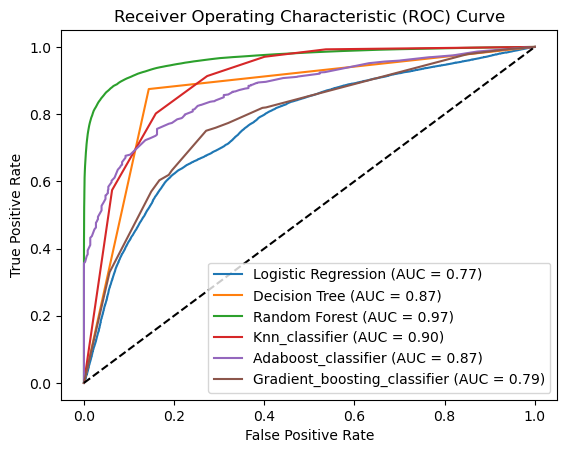

The best classifier is Random Forest with an AUC of 0.97.
Threshold values for Random Forest: [2.         1.         0.99       0.98       0.97       0.96
 0.955      0.95       0.94       0.93       0.92       0.91
 0.9        0.89       0.88       0.87       0.86       0.85
 0.84       0.83       0.8275     0.82       0.815      0.81
 0.8        0.79       0.78333333 0.78       0.775      0.77
 0.76       0.75       0.74       0.73       0.72       0.71
 0.7        0.69       0.68       0.67       0.66       0.6575
 0.65       0.64333333 0.64       0.63       0.62       0.61
 0.6        0.59       0.58       0.57       0.56333333 0.56
 0.55333333 0.55       0.54       0.53       0.52       0.51
 0.5        0.49       0.48       0.47       0.46       0.455
 0.45       0.44       0.43       0.42       0.41       0.4
 0.39       0.38       0.37       0.36       0.35       0.34
 0.33       0.32       0.31       0.3        0.29       0.28
 0.27       0.26       0.25       0.24       0.23 

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a dictionary to store the false positive rate (FPR) and true positive rate (TPR) for each classifier
roc_curves = {}

# Calculate and plot ROC curve for each classifier
for name, clf in classifiers.items():
    #clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    roc_curves[name] = (fpr, tpr, thresholds)  # Store the FPR, TPR, and thresholds for each classifier
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Find the best classifier based on the highest AUC value
best_classifier = max(roc_curves, key=lambda x: auc(roc_curves[x][0], roc_curves[x][1]))
best_fpr, best_tpr, best_thresholds = roc_curves[best_classifier]

print(f'The best classifier is {best_classifier} with an AUC of {auc(best_fpr, best_tpr):.2f}.')
print(f'Threshold values for {best_classifier}: {best_thresholds}')


In [31]:
# Assuming you have the best_fpr, best_tpr, and best_thresholds from the previous code
best_threshold_index = np.argmax(best_tpr - best_fpr)
best_threshold = best_thresholds[best_threshold_index]

print(f'The best threshold for {best_classifier} is {best_threshold:.2f}.')


The best threshold for Random Forest is 0.54.


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have trained a classification model named 'model'
# X: Features, y: Target

# Split data into train and test sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(classifiers['Random Forest'], X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean CV score:", cross_val_scores.mean())



Cross-validation scores: [0.85553373 0.85284774 0.85437847 0.85255892 0.85094154]
Mean CV score: 0.8532520794824399


In [ ]:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 15}

In [35]:

param_dist = {
    'criterion':['gini' , 'entropy'],
    
    'n_estimators': [100,150, 200, 80 ,50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 20, 40]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform randomized cross-validation hyperparameter tuning
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=20,
    scoring='recall', cv=3, verbose=2, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)



# Evaluate the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 30, 'criterion': 'gini'}
Accuracy: 0.8613, Precision: 0.6202, Recall: 0.2283, F1-Score: 0.3337


In [144]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators':[100,80,150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
# Instantiate GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred  = best_model.predict(X_test)
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

NameError: name 'GridSearchCV' is not defined